In [5]:
print("hwllo world")

hwllo world


c:\Users\sjuul\anaconda3\envs\afstuderen2025\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 500/500 [11:49<00:00,  1.42s/it]


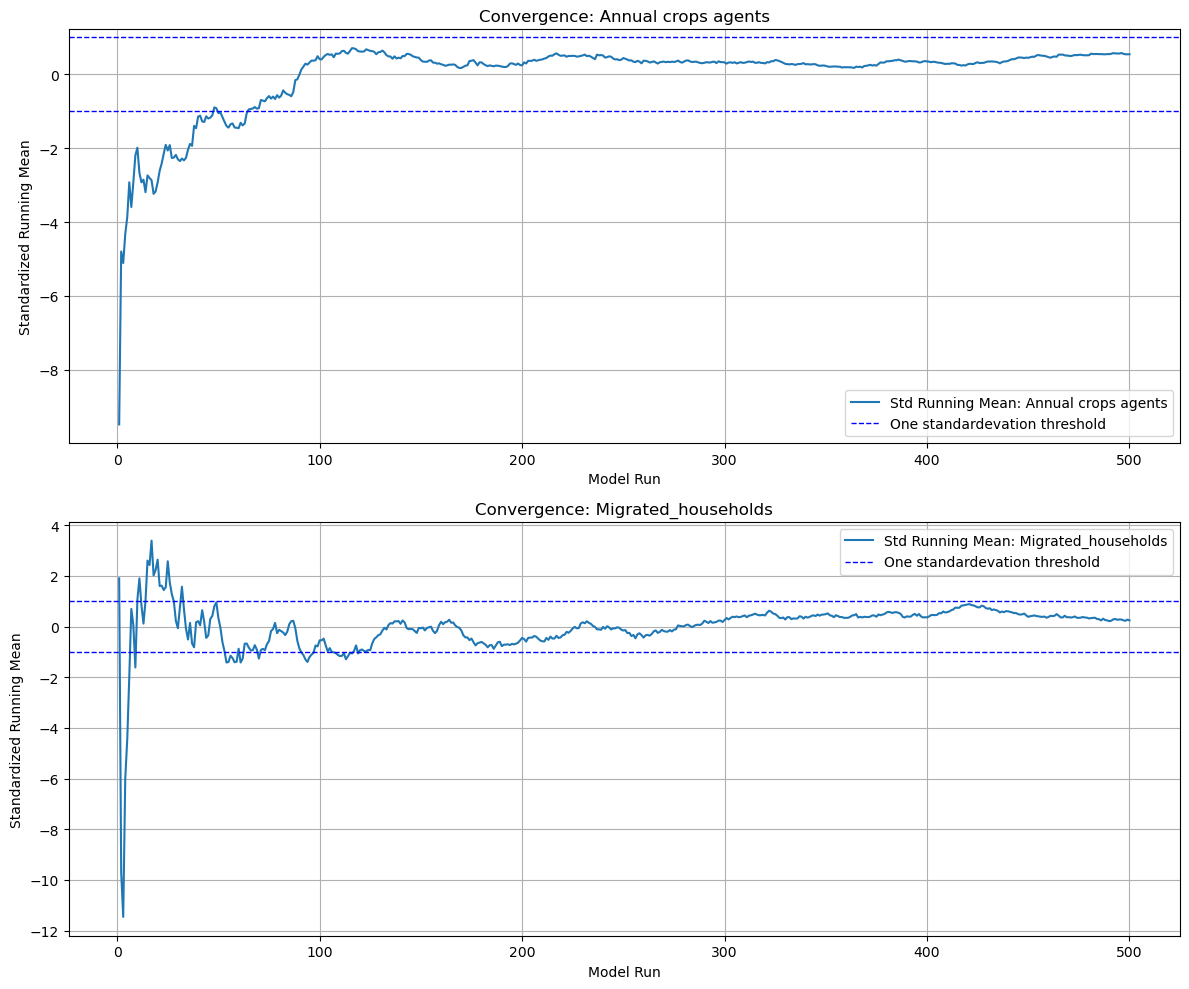

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from Model3 import  RiverDeltaModel
from mesa import batch_run
params = {"num_agents":[1000]}

result_batch = batch_run(
    RiverDeltaModel,
    parameters=params,
    iterations=500,
    max_steps=300,
    number_processes= 8,
    data_collection_period=10,
    display_progress=True,
)
df = pd.DataFrame(result_batch)
df = df[df["Step"]==df["Step"].max()]
df = df.reset_index()

# List of metrics to plot
metrics = ['Annual crops agents', "Migrated_households"]

# Assume df is your DataFrame containing these metrics

# Calculate running mean and standardize for each metric
for metric in metrics:
    df[f'{metric}_running_mean'] = df[metric].expanding().mean()
    mean = df[f'{metric}_running_mean'].mean()
    std = df[f'{metric}_running_mean'].std()
    df[f'{metric}_standardized'] = (df[f'{metric}_running_mean'] - mean) / std

# Plotting on 2x2 subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 10))
axs = axs.flatten()

for idx, metric in enumerate(metrics):
    axs[idx].plot(df.index + 1, df[f'{metric}_standardized'], label=f'Std Running Mean: {metric}')
    # Add the 0.5 and -0.5 red reference lines with one shared label
    axs[idx].axhline(1, color="blue", linestyle="--", linewidth=1)
    axs[idx].axhline(-1, color="blue", linestyle="--", linewidth=1, label="One standardevation threshold")
    axs[idx].set_title(f'Convergence: {metric}')
    axs[idx].set_xlabel('Model Run')
    axs[idx].set_ylabel('Standardized Running Mean')
    axs[idx].grid(True)

    # Add both plot and reference line to the legend
    axs[idx].legend()

plt.tight_layout()
plt.show()

In [3]:
df

,index,RunId,iteration,Step,num_agents,Migrated_households,Annual crops agents,Annual crops agents_running_mean,Annual crops agents_standardized,Migrated_households_running_mean,Migrated_households_standardized
0,30,6,6,300,1000,73,4,4.000000,-9.477473,73.000000,1.903225
1,61,3,3,300,1000,62,9,6.500000,-4.794721,67.500000,-9.704526
2,92,2,2,300,1000,65,6,6.333333,-5.106905,66.666667,-11.463276
3,123,5,5,300,1000,77,8,6.750000,-4.326446,69.250000,-6.011151
4,154,0,0,300,1000,73,8,7.000000,-3.858171,70.000000,-4.428276
...,...,...,...,...,...,...,...,...,...,...,...
495,15375,495,495,300,1000,71,13,9.368952,0.579114,72.229839,0.277799
496,15406,498,498,300,1000,65,4,9.358149,0.558879,72.215292,0.247098
497,15437,496,496,300,1000,68,6,9.351406,0.546249,72.206827,0.229234
498,15468,497,497,300,1000,83,9,9.350701,0.544929,72.228457,0.274883


In [1]:
import pandas as pd
import numpy as np
from mesa import batch_run
from Model3 import RiverDeltaModel

# Aantal runs per parameter
N = 100

# Parameterwaarden
machine_values = np.linspace(0, 1, N)
education_values = np.linspace(0, 1, N)
ww_salary_values = np.linspace(0, 2, N)
fixed_costs_rice_values = np.linspace(0, 32000000, N)
fixed_costs_maize_values = np.linspace(0, 7000000, N)
fixed_costs_coconut_values = np.linspace(0, 40000000, N)
fixed_costs_shrimp_values = np.linspace(0, 8000000, N)

# Functie om sensitivity analysis te draaien
def run_sensitivity(param_name, values):
    fixed_params = {
        # "machines_experiment": 2,
        # "education_level": 2,
        # "ww_salary_increase":1,
        "fixed_costs_rice" : 15900000,
        # "fixed_costs_maize" : 3400000,
        # "fixed_costs_coconut": 20000000,
        # "fixed_costs_shrimp" : 3900000
    }

    # Vervang de vaste waarde door de lijst met waarden voor die parameter
    fixed_params[param_name] = values

    # Eén batch_run met alle waardes voor de param_name
    result = batch_run(
        RiverDeltaModel,
        parameters=fixed_params,
        iterations=1,              # 1 run per parameterwaarde
        max_steps=300,
        number_processes=8,
        data_collection_period=300,
        display_progress=True,
    )

    # Zet om naar dataframe en voeg kolom met parameterwaarde toe
    df = pd.DataFrame(result)
    # In result zit automatisch per run de parameterwaarde in kolom param_name
    return df



c:\Users\sjuul\anaconda3\envs\afstuderen2025\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_fixed_rice = run_sensitivity("fixed_costs_rice", fixed_costs_rice_values)

100%|██████████| 100/100 [05:44<00:00,  3.45s/it]


In [2]:
# # Sensitivity for machines
df_machines = run_sensitivity("machines_experiment", machine_values)

# # Sensitivity for education_level
df_education = run_sensitivity("education_level", education_values)

# Sensitivity for ww_salary
df_ww_salary = run_sensitivity("ww_salary_increase", ww_salary_values)

df_fixed_rice = run_sensitivity("fixed_costs_rice", fixed_costs_rice_values)
df_fixed_maize = run_sensitivity("fixed_costs_maize", fixed_costs_maize_values)
df_fixed_coconut = run_sensitivity("fixed_costs_coconut", fixed_costs_coconut_values)
df_fixed_shrimp = run_sensitivity("fixed_costs_shrimp", fixed_costs_shrimp_values)


100%|██████████| 100/100 [02:21<00:00,  1.41s/it]


In [15]:
df_fixed_shrimp['Migrated_households'].value_counts().sum

<bound method Series.sum of Migrated_households
0     100
67    100
Name: count, dtype: int64>

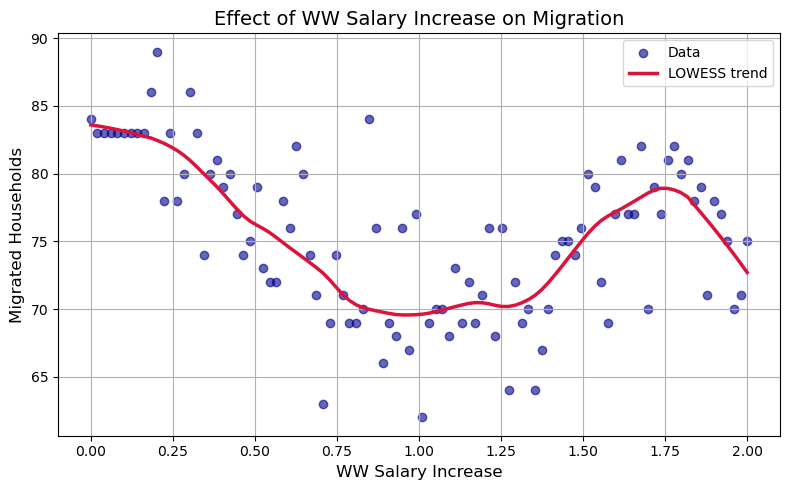

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

# Filter alleen data op step 300
df_ww_salary = df_ww_salary[df_ww_salary["Step"] == 300]

# X en Y
x = df_ww_salary["ww_salary_increase"]
y = df_ww_salary["Migrated_households"]

# LOWESS smoothing
lowess = sm.nonparametric.lowess
smoothed = lowess(y, x, frac=0.2)  # frac bepaalt hoeveel smoothing (0.1 = weinig, 0.5 = veel)

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.6, color="darkblue", label="Data")
plt.plot(smoothed[:, 0], smoothed[:, 1], color="crimson", linewidth=2.5, label="LOWESS trend")
plt.title("Effect of WW Salary Increase on Migration", fontsize=14)
plt.xlabel("WW Salary Increase", fontsize=12)
plt.ylabel("Migrated Households", fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


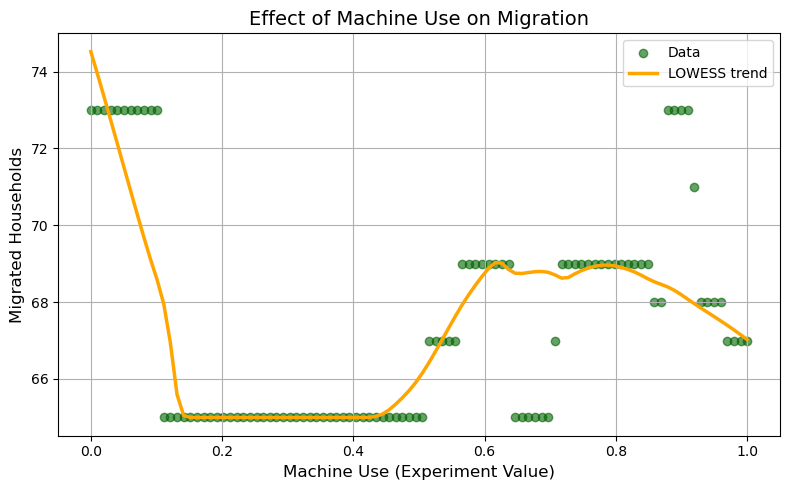

In [10]:
df_machines
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Filter alleen step 300
df_machines = df_machines[df_machines["Step"] == 300]

# X en Y
x = df_machines["machines_experiment"]
y = df_machines["Migrated_households"]

# LOWESS smoothing
lowess = sm.nonparametric.lowess
smoothed = lowess(y, x, frac=0.2)  # pas frac aan indien nodig

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.6, color="darkgreen", label="Data")
plt.plot(smoothed[:, 0], smoothed[:, 1], color="orange", linewidth=2.5, label="LOWESS trend")
plt.title("Effect of Machine Use on Migration", fontsize=14)
plt.xlabel("Machine Use (Experiment Value)", fontsize=12)
plt.ylabel("Migrated Households", fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [6]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Baselinewaarden
baseline_values = {
    "machines_experiment": 0.10,
    "education_level": 0.32,
    "ww_salary_increase": 1,
    "fixed_costs_rice": 15900000,
    "fixed_costs_maize": 3400000,
    "fixed_costs_coconut": 20000000,
    "fixed_costs_shrimp": 3900000
}

def plot_lowess(df, x_col, y_col="Migrated_households", step_col="Step", step_value=300, 
                title=None, xlabel=None, ylabel="Percentage migrated households"):
    """
    Maakt een LOWESS scatterplot van x_col vs. y_col, gefilterd op step_col == step_value.
    Toont ook een verticale rode lijn op de baselinewaarde van de parameter.
    """
    # Filter data op gewenste timestep
    df_filtered = df[df[step_col] == step_value]

    x = df_filtered[x_col]
    y = (df_filtered[y_col] / 275)  # percentage i.p.v. aantal

    # LOWESS smoothing
    lowess = sm.nonparametric.lowess
    smoothed = lowess(y, x, frac=0.2)

    # Plot
    plt.figure(figsize=(8, 5))
    plt.scatter(x, y, alpha=0.6, color="green", label="Data")
    plt.plot(smoothed[:, 0], smoothed[:, 1], color="navy", linewidth=2.5, label="LOWESS trend")

    # Verticale baseline lijn
    if x_col in baseline_values:
        baseline_x = baseline_values[x_col]
        plt.axvline(baseline_x, color="red", linestyle="--", linewidth=2, label="Baseline")

    plt.title(title if title else f"{x_col} vs. {y_col}")
    plt.xlabel(xlabel if xlabel else x_col.replace("_", " ").title())
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.ylim(0.15, 0.55)
    plt.show()


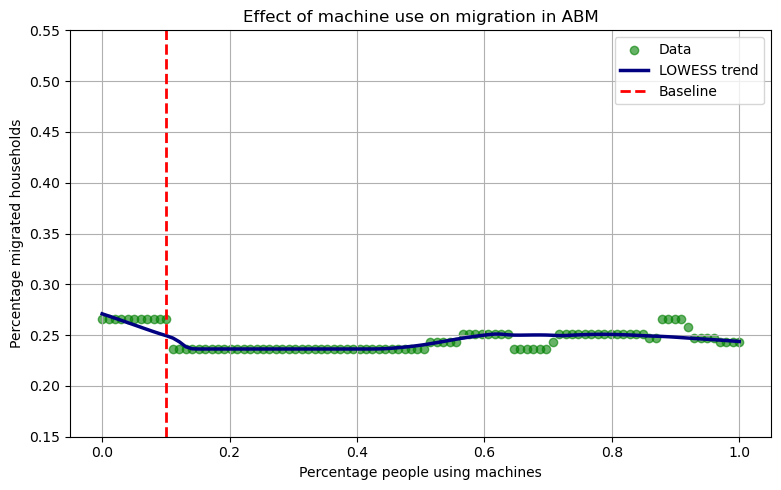

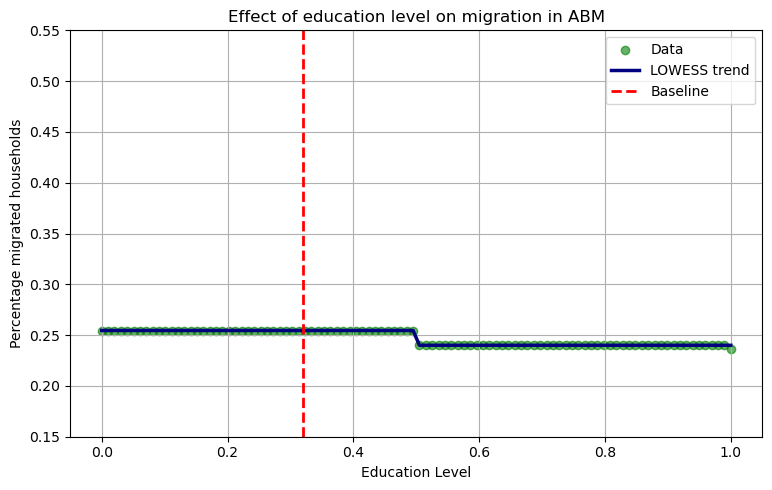

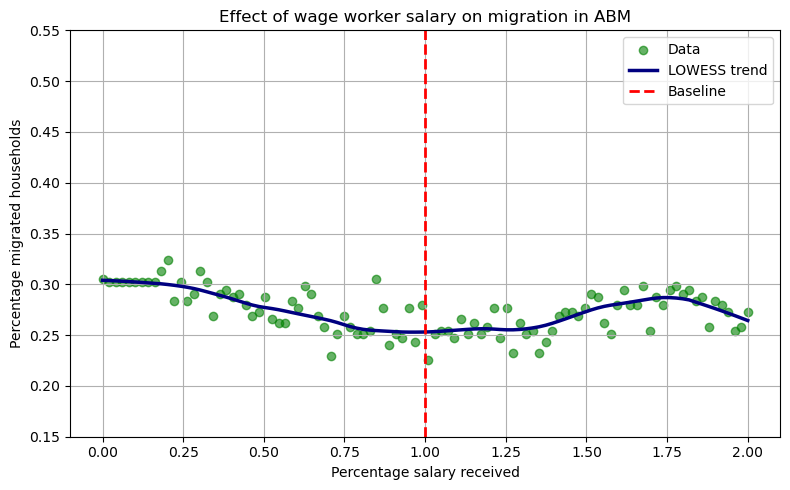

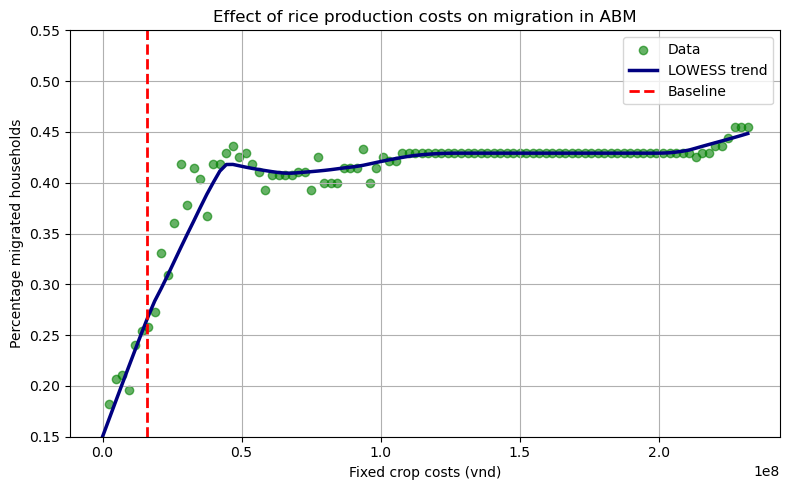

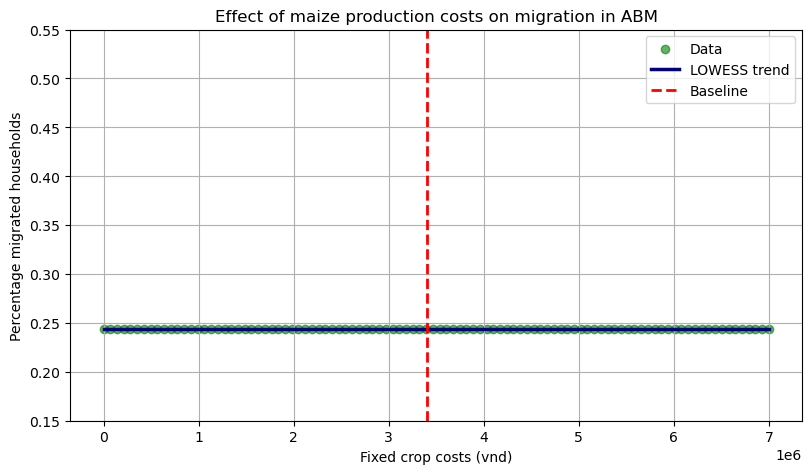

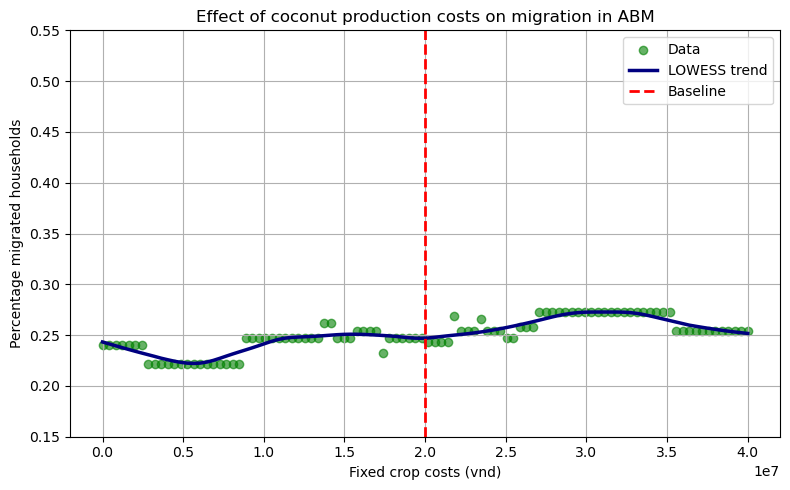

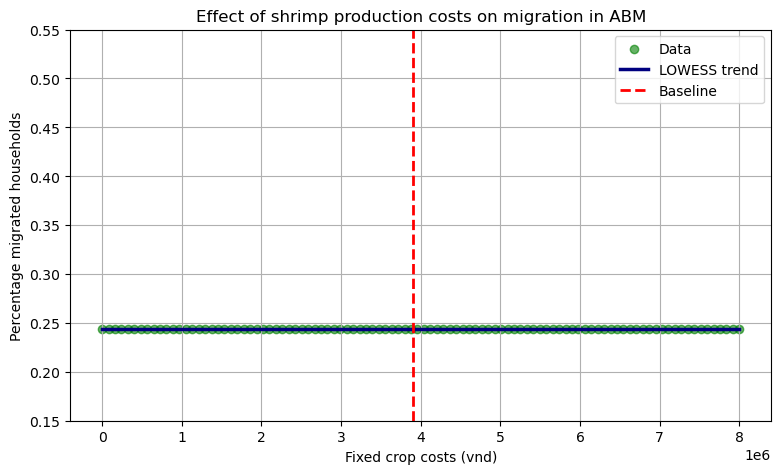

In [47]:
plot_lowess(df_machines, "machines_experiment", title="Effect of machine use on migration in ABM", xlabel="Percentage people using machines")

plot_lowess(df_education, "education_level", title="Effect of education level on migration in ABM", xlabel="Education Level")

plot_lowess(df_ww_salary, "ww_salary_increase", title="Effect of wage worker salary on migration in ABM", xlabel="Percentage salary received")

plot_lowess(df_fixed_rice, "fixed_costs_rice", title="Effect of rice production costs on migration in ABM", xlabel="Fixed crop costs (vnd)")

plot_lowess(df_fixed_maize, "fixed_costs_maize", title="Effect of maize production costs on migration in ABM", xlabel="Fixed crop costs (vnd)")

plot_lowess(df_fixed_coconut, "fixed_costs_coconut", title="Effect of coconut production costs on migration in ABM", xlabel="Fixed crop costs (vnd)")

plot_lowess(df_fixed_shrimp, "fixed_costs_shrimp", title="Effect of shrimp production costs on migration in ABM", xlabel="Fixed crop costs (vnd)")


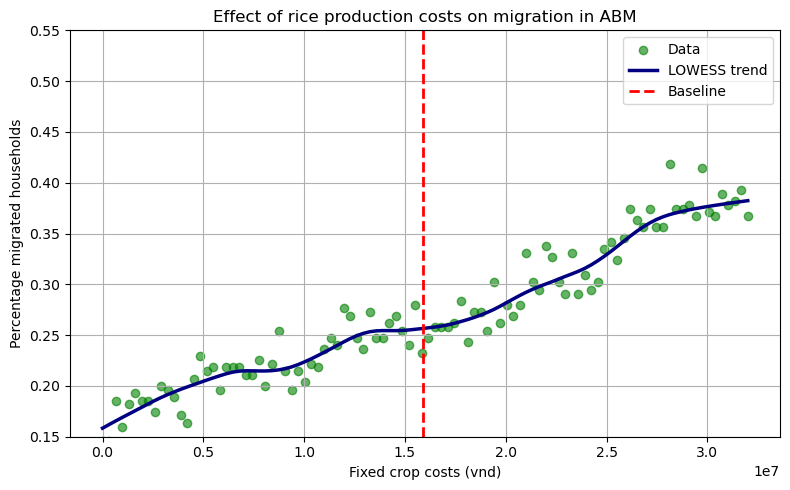

In [7]:
plot_lowess(df_fixed_rice, "fixed_costs_rice", title="Effect of rice production costs on migration in ABM", xlabel="Fixed crop costs (vnd)")


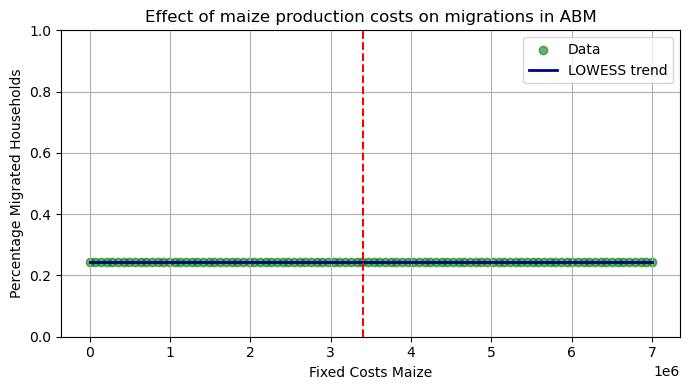

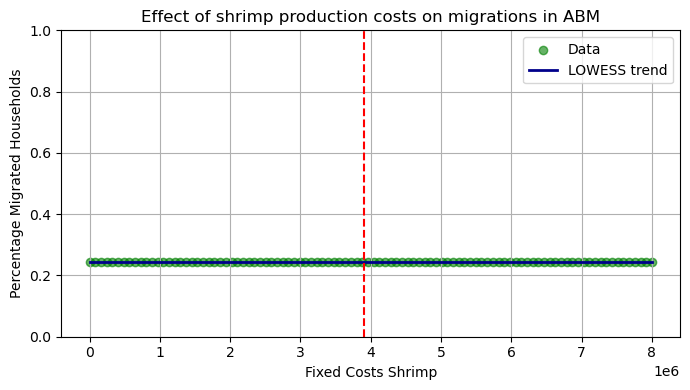

In [38]:
def plot_lowess(df, x_col, y_col="Migrated_households", step_col="Step", step_value=300, 
                title=None, invert_y=False):
    import statsmodels.api as sm
    import matplotlib.pyplot as plt

    # Referentiewaarden voor verticale lijnen
    vlines_dict = {
        "machines_experiment": 2, 
        "education_level": 2,
        "ww_salary_increase": 1,
        "fixed_costs_rice": 15900000,
        "fixed_costs_maize": 3400000,
        "fixed_costs_coconut": 20000000,
        "fixed_costs_shrimp": 3900000
    }

    # Filter op gewenste stap
    df_step = df[df[step_col] == step_value]

    # Bereken y als percentage migraties of niet-migraties
    
    y = (df_step[y_col] / 275)
    

    x = df_step[x_col]

    # LOWESS fit
    lowess = sm.nonparametric.lowess
    z = lowess(y, x, frac=0.2)

    # Plot
    plt.figure(figsize=(7, 4))
    plt.scatter(x, y, alpha=0.6, label="Data", color="green")
    plt.plot(z[:, 0], z[:, 1], color="darkblue", linewidth=2, label="LOWESS trend")

    # Vertikale rode stippellijn als x_col in referentie
    if x_col in vlines_dict:
        plt.axvline(x=vlines_dict[x_col], color='red', linestyle='--', linewidth=1.5)

    plt.xlabel(x_col.replace("_", " ").title())
    plt.ylabel("Percentage Migrated Households" if not invert_y else "Percentage Not Migrated")
    if title:
        plt.title(title)

    plt.ylim(0, 1)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_lowess(df_fixed_maize, "fixed_costs_maize", title="Effect of maize production costs on migrations in ABM")
plot_lowess(df_fixed_shrimp, "fixed_costs_shrimp", title="Effect of shrimp production costs on migrations in ABM")




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from Model3 import RiverDeltaModel
from mesa import batch_run

# 1. Batch run uitvoeren (max 150 stappen)
params = {"num_agents": [1000]}
result_batch = batch_run(
    RiverDeltaModel,
    parameters=params,
    iterations=150,
    max_steps=300,  
    number_processes=8,
    data_collection_period=1,  # verzamel data op elke stap
    display_progress=True,
)

# 2. Gemiddelde berekenen per stap
df = pd.DataFrame(result_batch)
# metrics = [
#     "Migrated_households",
#     "Migrated_members",
#     "Migrated_individuals",
#     "Crop_type",
#     "Land_category",
#     "Savings",
#     "too low income",
#     "Number_of_wage_workers",
#     "Debt ratio",
#     "ww_costs_rice",
#     "ww_costs_maize",
#     "ww_costs_coconut",
#     "ww_costs_shrimp",
#     "total_income_rice",
#     "total_income_maize",
#     "total_income_coconut",
#     "total_income_shrimp",
#     "yield_rice",
#     "yield_maize",
#     "yield_coconut",
#     "yield_shrimp",
#     "land_size"
# ]

# df_mean = df.groupby("Step")[metrics].mean().reset_index()



c:\Users\sjuul\anaconda3\envs\afstuderen2025\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 150/150 [07:48<00:00,  3.12s/it]


In [2]:
df


,RunId,iteration,Step,num_agents,Savings Rice small,Yield Rice small,Income Rice small,Wage costs Rice small,Debt ratio Rice small,Count Rice small,...,Wage costs Shrimp medium,Debt ratio Shrimp medium,Count Shrimp medium,Savings Shrimp large,Yield Shrimp large,Income Shrimp large,Wage costs Shrimp large,Debt ratio Shrimp large,Count Shrimp large,Migrated_households
0,0,0,0,1000,2.000000e+07,NaN,NaN,NaN,NaN,29,...,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,0,0
1,0,0,1,1000,2.161095e+07,2291.014382,7.526497e+06,550344.827586,NaN,29,...,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,0,0
2,0,0,2,1000,2.161095e+07,2291.014382,7.526497e+06,550344.827586,NaN,29,...,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,0,0
3,0,0,3,1000,2.161095e+07,2291.014382,7.526497e+06,550344.827586,NaN,29,...,0.000000,NaN,2,NaN,NaN,NaN,NaN,NaN,0,0
4,0,0,4,1000,2.161095e+07,2291.014382,7.526497e+06,550344.827586,NaN,29,...,0.000000,NaN,2,NaN,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45145,149,149,296,1000,8.373080e+08,2125.958888,6.984252e+06,676847.826087,0.0,4,...,694202.898551,0.0,3,NaN,NaN,NaN,NaN,NaN,0,78
45146,149,149,297,1000,8.373080e+08,2125.958888,6.984252e+06,676847.826087,0.0,4,...,694202.898551,0.0,3,NaN,NaN,NaN,NaN,NaN,0,78
45147,149,149,298,1000,8.791734e+08,2125.958888,6.984252e+06,676847.826087,0.0,4,...,694202.898551,0.0,3,NaN,NaN,NaN,NaN,NaN,0,78
45148,149,149,299,1000,8.791734e+08,2125.958888,6.984252e+06,676847.826087,0.0,4,...,694202.898551,0.0,3,NaN,NaN,NaN,NaN,NaN,0,78


In [3]:
df.columns


Index(['RunId', 'iteration', 'Step', 'num_agents', 'Savings Rice small',
       'Yield Rice small', 'Income Rice small', 'Wage costs Rice small',
       'Debt ratio Rice small', 'Count Rice small', 'Savings Rice medium',
       'Yield Rice medium', 'Income Rice medium', 'Wage costs Rice medium',
       'Debt ratio Rice medium', 'Count Rice medium', 'Savings Rice large',
       'Yield Rice large', 'Income Rice large', 'Wage costs Rice large',
       'Debt ratio Rice large', 'Count Rice large', 'Savings Maize small',
       'Yield Maize small', 'Income Maize small', 'Wage costs Maize small',
       'Debt ratio Maize small', 'Count Maize small', 'Savings Maize medium',
       'Yield Maize medium', 'Income Maize medium', 'Wage costs Maize medium',
       'Debt ratio Maize medium', 'Count Maize medium', 'Savings Maize large',
       'Yield Maize large', 'Income Maize large', 'Wage costs Maize large',
       'Debt ratio Maize large', 'Count Maize large', 'Savings Coconut small',
       'Yiel

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Groepeer op Step, en bereken gemiddelde en standaarddeviatie
grouped = df.groupby("Step")["Number_of_wage_workers"].agg(["mean", "std"])

# Maak een jaartallen-index
year_index = grouped.index / 12 + 2014

# Plot
plt.figure(figsize=(6, 4))
plt.plot(year_index, grouped["mean"], label="Number of wage workers")
plt.fill_between(year_index,
                 grouped["mean"] - grouped["std"],
                 grouped["mean"] + grouped["std"],
                 alpha=0.3)
plt.xlabel("Year")
plt.ylabel("Wage workers")
plt.title("Number of wage workers over time in ABM")
plt.legend()
plt.ylim(0, 300)
plt.grid(True)


plt.tight_layout()
plt.show()


KeyError: 'Column not found: Number_of_wage_workers'

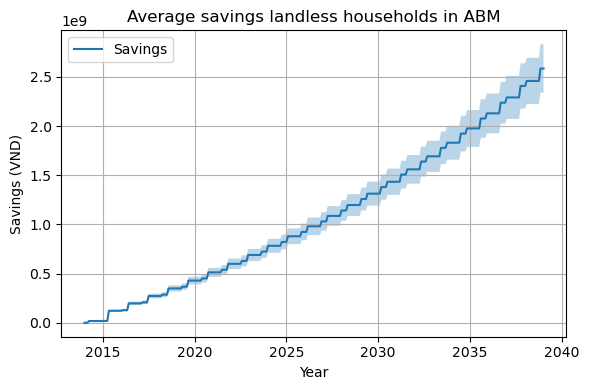

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Groepeer op Step, en bereken gemiddelde en standaarddeviatie
grouped = df.groupby("Step")["Savings_landless_hh"].agg(["mean", "std"])

# Maak een jaartallen-index
year_index = grouped.index / 12 + 2014

# Plot
plt.figure(figsize=(6, 4))
plt.plot(year_index, grouped["mean"], label="Savings")
plt.fill_between(year_index,
                 grouped["mean"] - grouped["std"],
                 grouped["mean"] + grouped["std"],
                 alpha=0.3)
plt.xlabel("Year")
plt.ylabel("Savings (VND)")
plt.title("Average savings landless households in ABM")
plt.legend()

plt.grid(True)


plt.tight_layout()
plt.show()

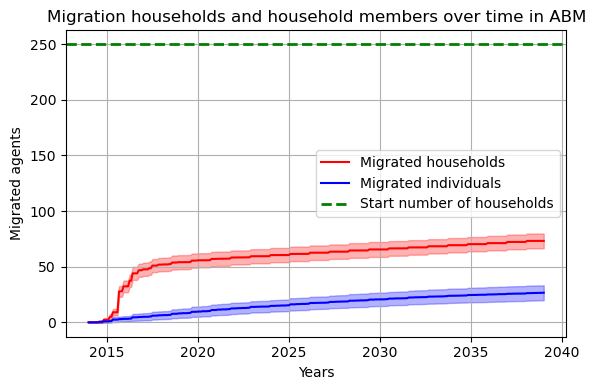

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Groepeer per jaar voor gemiddelden en standaardafwijking
migration_grouped = df.groupby('Step')[['Migrated_households', 'Migrated_individuals']].agg(['mean', 'std'])

year_index = migration_grouped.index / 12 + 2014

hh_mean = migration_grouped[('Migrated_households', 'mean')]
hh_std = migration_grouped[('Migrated_households', 'std')]

ind_mean = migration_grouped[('Migrated_individuals', 'mean')]
ind_std = migration_grouped[('Migrated_individuals', 'std')]

# Plot
plt.figure(figsize=(6,4))

# Households
plt.plot(year_index, hh_mean, label='Migrated households', color='red')
plt.fill_between(year_index, hh_mean - hh_std, hh_mean + hh_std, alpha=0.3, color='red')

# Individuals
plt.plot(year_index, ind_mean, label='Migrated individuals', color='blue')
plt.fill_between(year_index, ind_mean - ind_std, ind_mean + ind_std, alpha=0.3, color='blue')

# Dotted threshold line
plt.axhline(y=250, color='green', linestyle='--', linewidth=2, label='Start number of households')

# Styling
plt.xlabel('Years')
plt.ylabel('Migrated agents')
plt.title('Migration households and household members over time in ABM')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


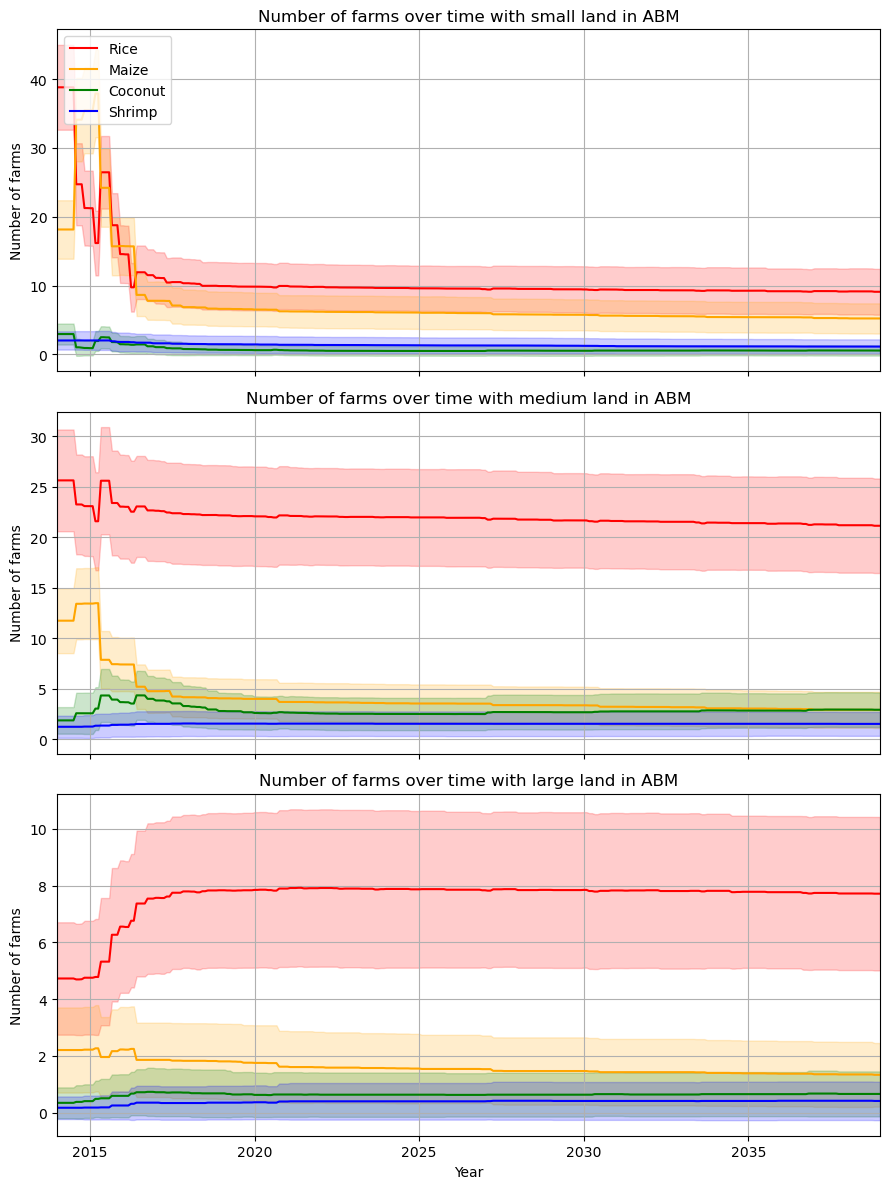

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Strip kolomnamen van spaties
df.columns = [col.strip() for col in df.columns]

# Mapping crops naar kleuren
crop_colors = {
    "Rice": "red",
    "Maize": "orange",
    "Coconut": "green",
    "Shrimp": "blue"
}

# Setup
land_categories = ["small", "medium", "large"]
crops = ["Rice", "Maize", "Coconut", "Shrimp"]
years = df["Step"] / 12 + 2014  # Step → jaren

# Maak figuur met 3 subplots onder elkaar
fig, axes = plt.subplots(3, 1, figsize=(9, 12), sharex=True)

for i, land in enumerate(land_categories):
    ax = axes[i]
    
    for crop in crops:
        col = f"Count {crop} {land}"
        if col in df.columns:
            grouped = df.groupby("Step")[col].mean()
            std = df.groupby("Step")[col].std()

            year_index = grouped.index / 12 + 2014  # omzetten naar jaren
            ax.plot(year_index, grouped.values, label=crop, color=crop_colors[crop])
            ax.fill_between(year_index, grouped - std, grouped + std, color=crop_colors[crop], alpha=0.2)

    ax.set_title(f"Number of farms over time with {land} land in ABM")
    ax.set_ylabel("Number of farms")
    ax.grid(True)

# X-as onderaan instellen
axes[-1].set_xlabel("Year")
axes[-1].set_xlim([2014, 2014 + 25])  # 25 jaar

# Legenda bovenaan
axes[0].legend(loc="upper left")

plt.tight_layout()
plt.show()



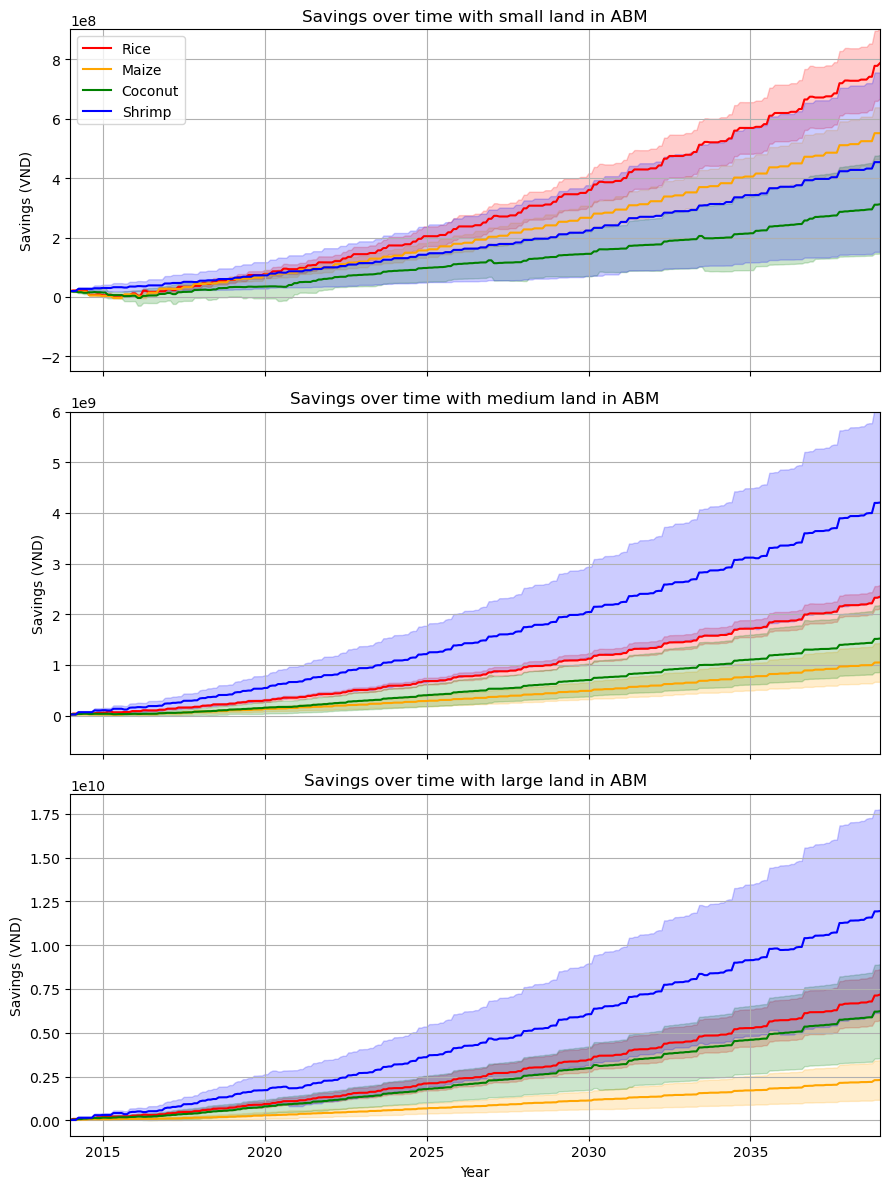

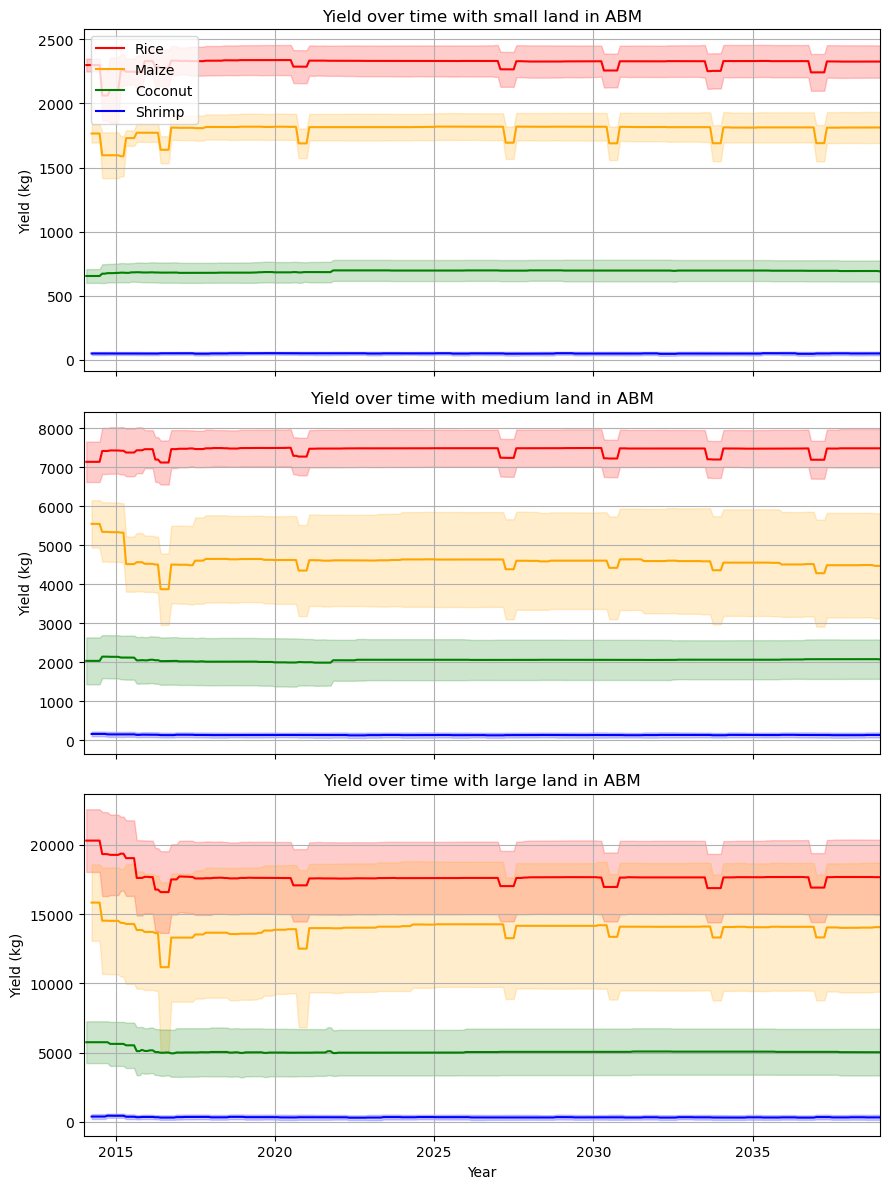

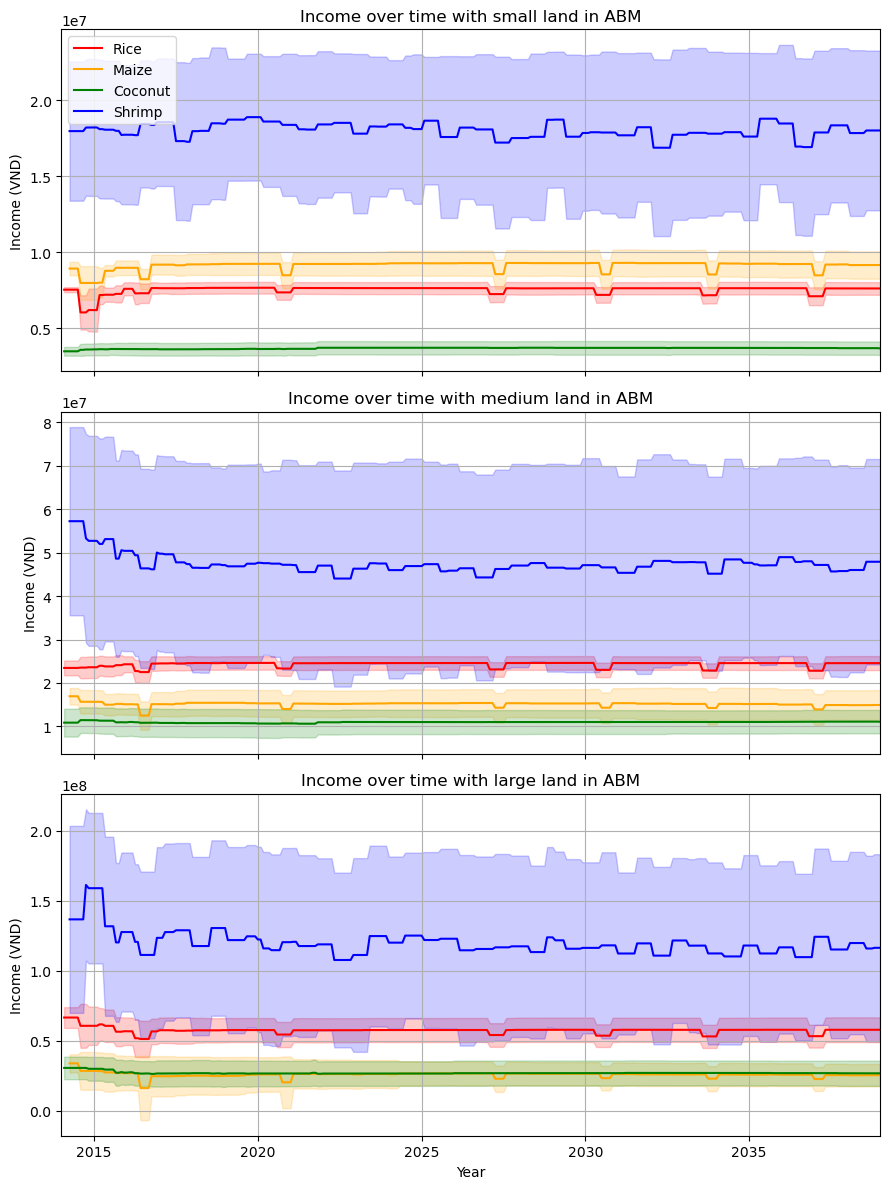

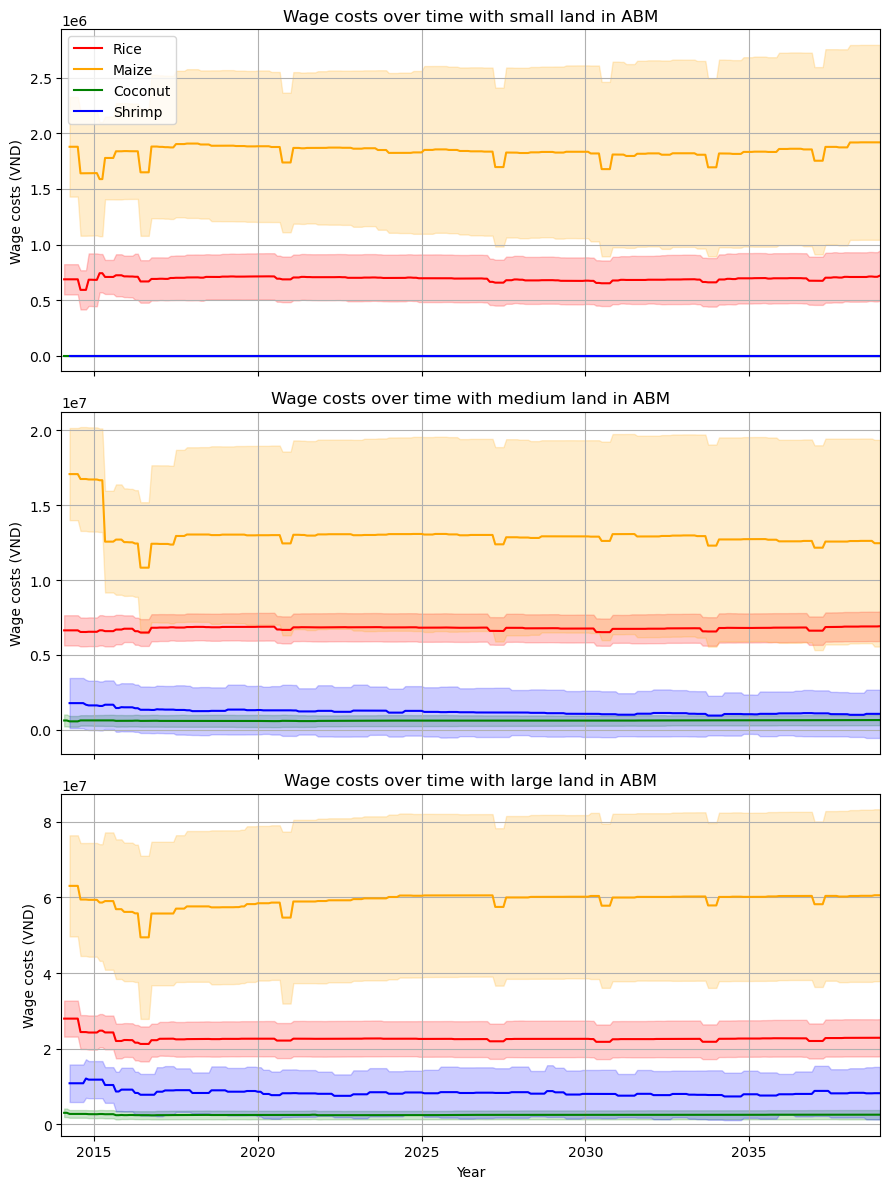

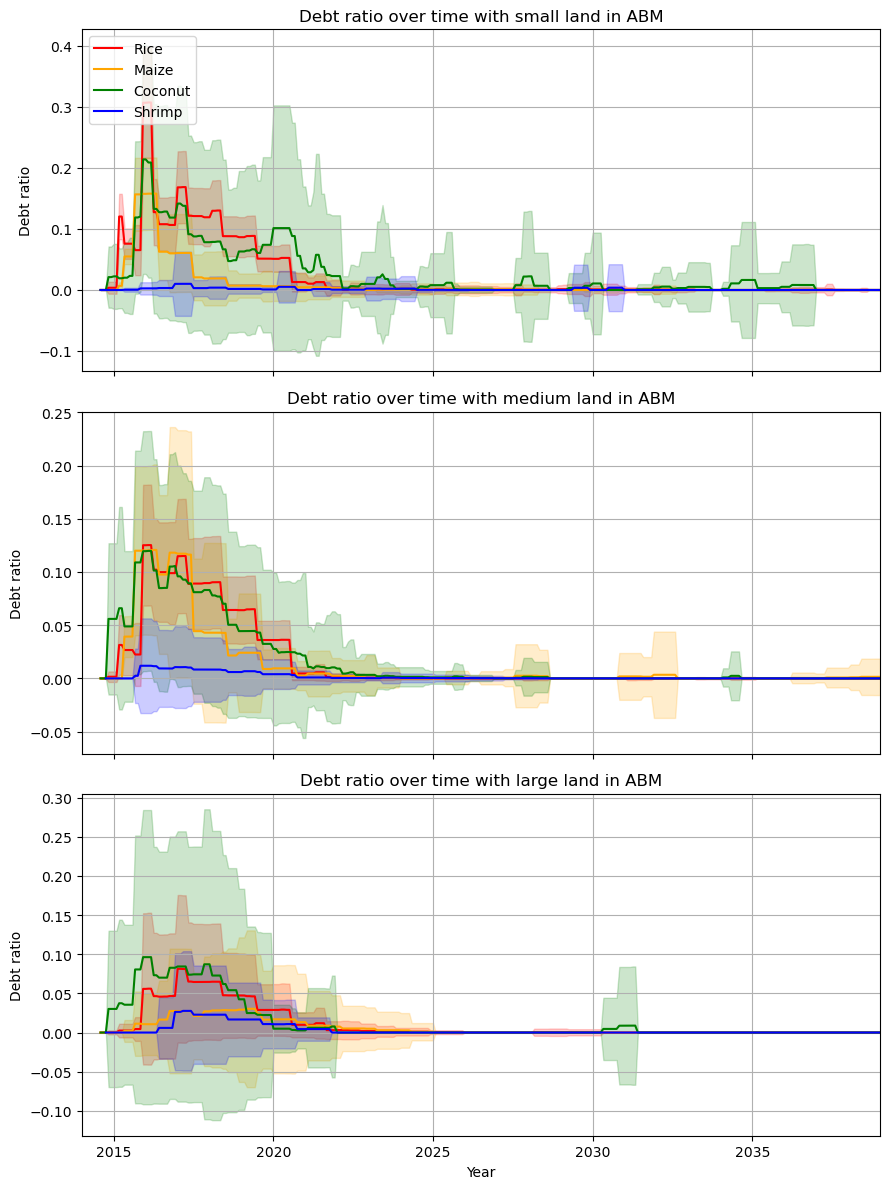

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# df = pd.read_csv("jouw_data.csv")
df.columns = [col.strip() for col in df.columns]

crop_colors = {
    "Rice": "red",
    "Maize": "orange",
    "Coconut": "green",
    "Shrimp": "blue"
}

variables = ["Savings", "Yield", "Income", "Wage costs", "Debt ratio"]
land_categories = ["small", "medium", "large"]
crops = ["Rice", "Maize", "Coconut", "Shrimp"]

# Eenheden voor y-as
units = {
    "Savings": "VND",
    "Income": "VND",
    "Yield": "kg",
    "Wage costs": "VND",
    "Debt ratio": ""  # geen eenheid
}

for var in variables:
    fig, axes = plt.subplots(3, 1, figsize=(9,12), sharex=True)

    for i, land in enumerate(land_categories):
        ax = axes[i]

        for crop in crops:
            col = f"{var} {crop} {land}"
            if col in df.columns:
                grouped = df.groupby("Step")[col].mean()
                std = df.groupby("Step")[col].std()
                years = grouped.index / 12 + 2014

                ax.plot(years, grouped, label=crop, color=crop_colors[crop])
                ax.fill_between(years, grouped - std, grouped + std, color=crop_colors[crop], alpha=0.2)

        unit_label = f" ({units[var]})" if units[var] else ""
        ax.set_title(f"{var} over time with {land} land in ABM")
        ax.set_ylabel(f"{var}{unit_label}")
        ax.grid(True)

        # Specifieke y-as limieten voor 'Savings'
        if var == "Savings":
            if land == "small":
                ax.set_ylim([-2.5e8, 9e8])
            elif land == "medium":
                ax.set_ylim([-0.75e9, 6e9])


    axes[-1].set_xlabel("Year")
    axes[-1].set_xlim([2014, 2014 + 25])
    axes[0].legend(loc="upper left")

    plt.tight_layout()
    plt.show()


##DIT HIERONDER IS VOOR DE OUDE AGENT METRICSSSS

In [ ]:
df_crops = df[["Step","Rice small",
    "Rice medium",
    "Rice large",
    "Annual crops small",
    "Annual crops medium",
    "Annual crops large",
    "Coconut small",
    "Coconut medium",
    "Coconut large",
    "Shrimp small",
    "Shrimp medium",
    "Shrimp large"]]

In [ ]:
df_crops

,Rice small,Rice medium,Rice large,Annual crops small,Annual crops medium,Annual crops large,Coconut small,Coconut medium,Coconut large,Shrimp small,Shrimp medium,Shrimp large
0,31,18,2,22,17,2,3,1,0,2,1,0
1,17,17,2,36,18,2,2,1,0,2,1,0
2,17,17,2,36,18,2,2,1,0,2,1,0
3,17,17,2,36,18,2,2,1,0,2,1,0
4,17,17,2,36,18,2,2,1,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4940095,15,20,11,8,2,0,1,3,0,4,1,0
4940096,15,20,11,8,2,0,1,3,0,4,1,0
4940097,15,20,11,8,2,0,1,3,0,4,1,0
4940098,15,20,11,8,2,0,1,3,0,4,1,0


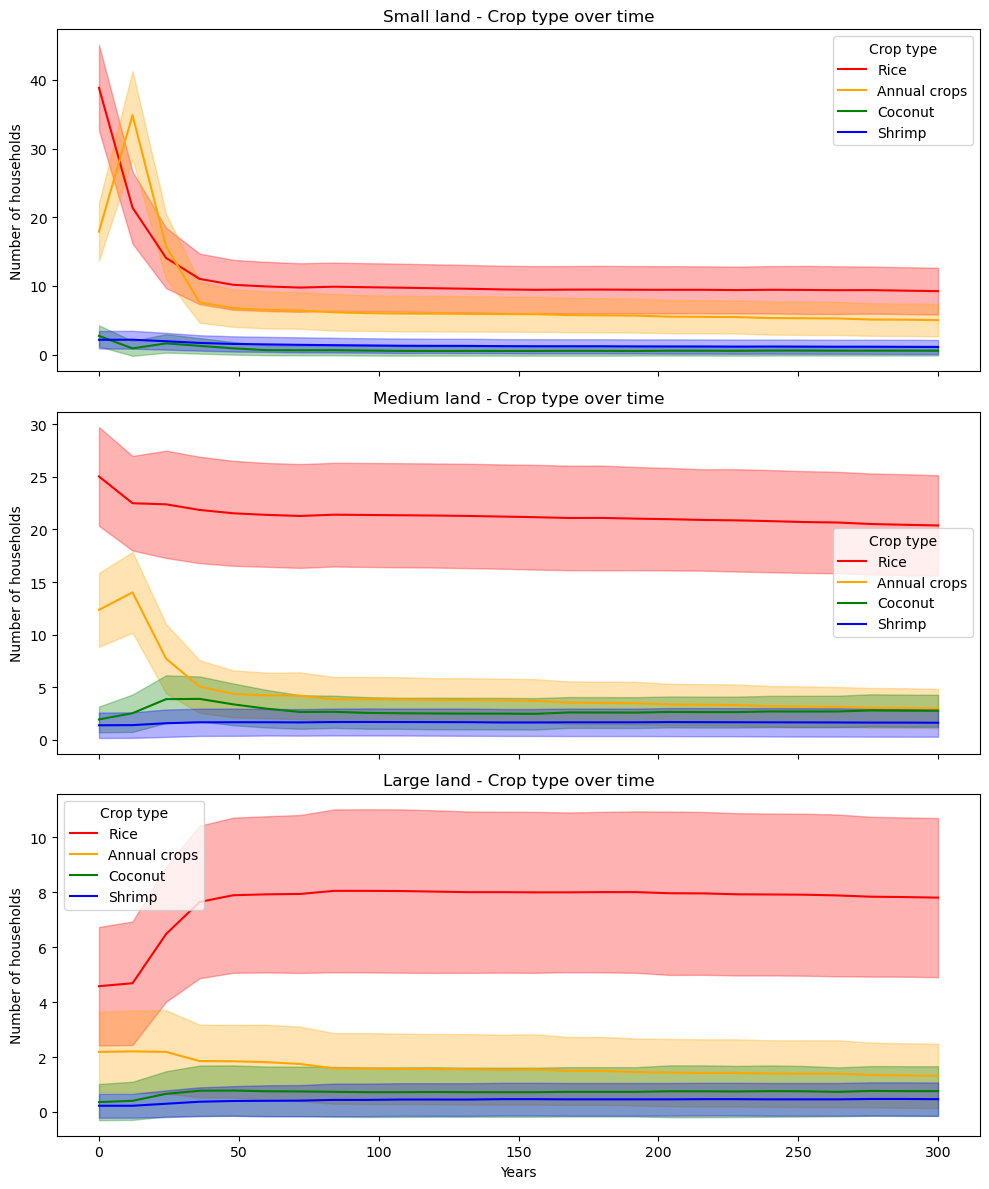

In [ ]:
crop_vars = [
    "Rice small", "Rice medium", "Rice large",
    "Annual crops small", "Annual crops medium", "Annual crops large",
    "Coconut small", "Coconut medium", "Coconut large",
    "Shrimp small", "Shrimp medium", "Shrimp large"
]

# Voeg kolom 'Years' toe als alias voor 'Step'
df['Years'] = df['Step']

# Gemiddelde en standaardafwijking per jaar per variabele
grouped = df.groupby("Years")[crop_vars].agg(['mean', 'std'])

# Plotten per landgrootte
land_sizes = ['small', 'medium', 'large']
colors = {
    'Rice': 'red',
    'Annual crops': 'orange',
    'Coconut': 'green',
    'Shrimp': 'blue'
}

fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=True)
for i, size in enumerate(land_sizes):
    ax = axes[i]
    for crop in ['Rice', 'Annual crops', 'Coconut', 'Shrimp']:
        col = f"{crop} {size}"
        mean = grouped[col]['mean']
        std = grouped[col]['std']
        ax.plot(mean.index, mean.values, label=crop, color=colors[crop])
        ax.fill_between(mean.index, mean - std, mean + std, alpha=0.3, color=colors[crop])

    ax.set_title(f"{size.capitalize()} land - Crop type over time")
    ax.set_ylabel("Number of households")
    ax.legend(title="Crop type")

axes[-1].set_xlabel("Years")
plt.tight_layout()
plt.show()

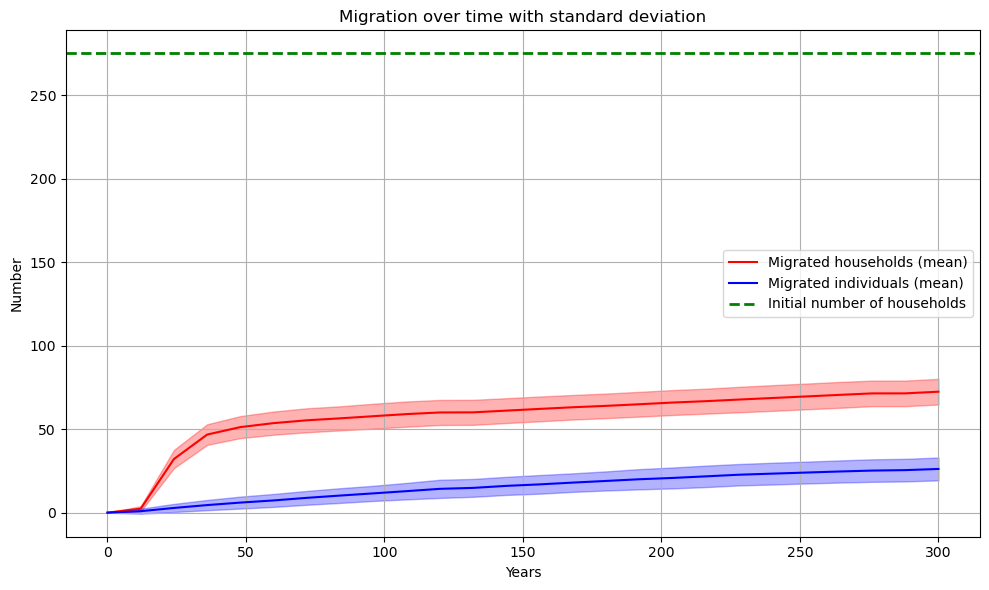

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Groepeer per jaar voor gemiddelden en standaardafwijking
migration_grouped = df.groupby('Years')[['Migrated_households', 'Migrated_individuals']].agg(['mean', 'std'])

# Haal de juiste series eruit
years = migration_grouped.index

hh_mean = migration_grouped[('Migrated_households', 'mean')]
hh_std = migration_grouped[('Migrated_households', 'std')]

ind_mean = migration_grouped[('Migrated_individuals', 'mean')]
ind_std = migration_grouped[('Migrated_individuals', 'std')]

# Plot
plt.figure(figsize=(10, 6))

# Households
plt.plot(years, hh_mean, label='Migrated households (mean)', color='red')
plt.fill_between(years, hh_mean - hh_std, hh_mean + hh_std, alpha=0.3, color='red')

# Individuals
plt.plot(years, ind_mean, label='Migrated individuals (mean)', color='blue')
plt.fill_between(years, ind_mean - ind_std, ind_mean + ind_std, alpha=0.3, color='blue')

# Dotted threshold line
plt.axhline(y=275, color='green', linestyle='--', linewidth=2, label='Initial number of households')

# Styling
plt.xlabel('Years')
plt.ylabel('Number')
plt.title('Migration over time with standard deviation')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
df["Savings"].describe()

count    7.999510e+05
mean     1.185289e+09
std      1.553186e+09
min     -2.413033e+09
25%      2.288089e+08
50%      6.488902e+08
75%      1.532423e+09
max      7.439716e+10
Name: Savings, dtype: float64

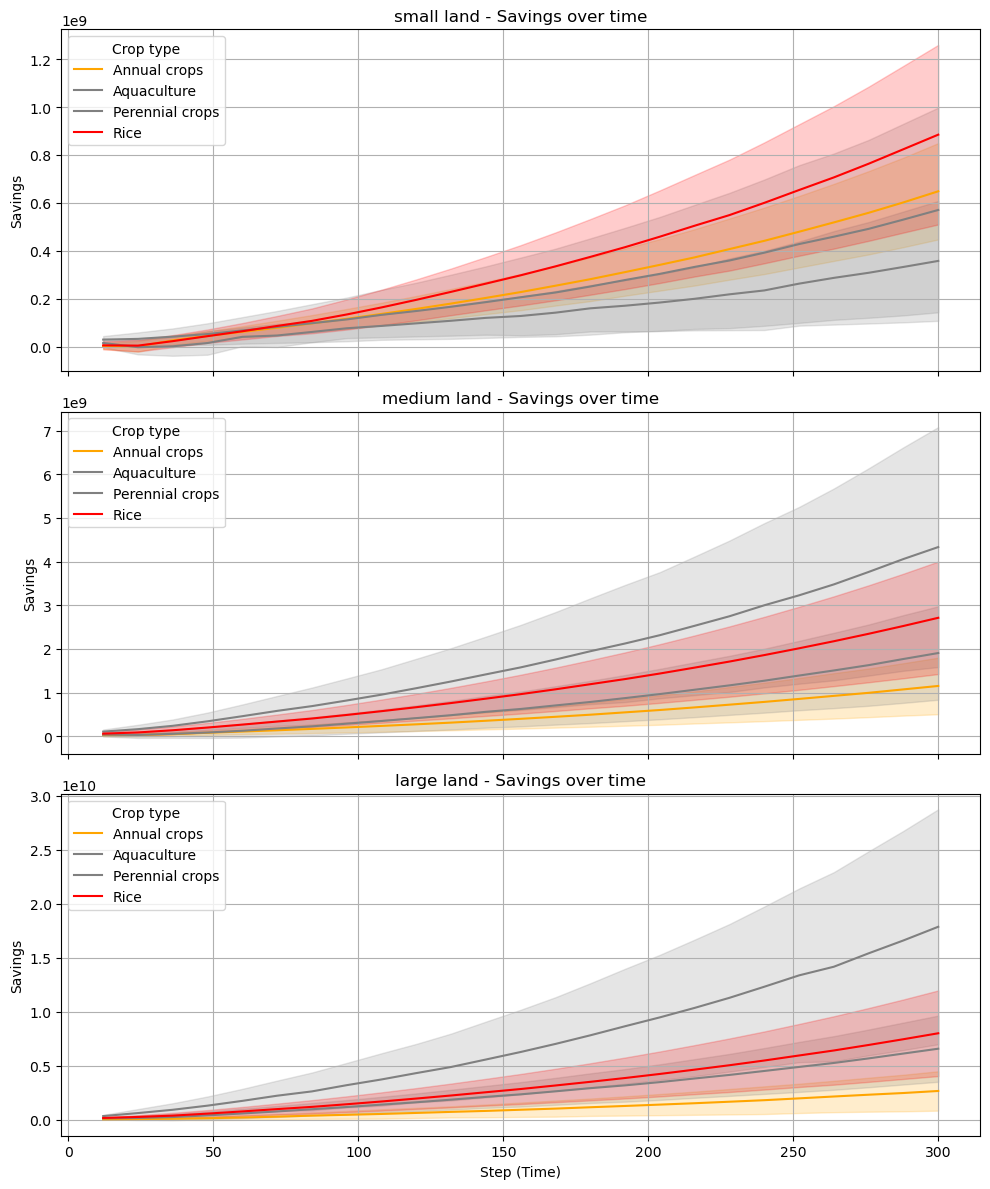

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Veronderstel dat je data al in een DataFrame zit genaamd df

# Groepeer de data per tijd (Step), landcategorie en crop type
grouped = df.groupby(['Step', 'Land_category', 'Crop_type'])['Savings'].agg(['mean', 'std']).reset_index()

# Maak de subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=True)
land_categories = ['small', 'medium', 'large']
colors = {'Rice': 'red', 'Coconut': 'green', 'Shrimp': 'blue', 'Annual crops': 'orange'}

for ax, land in zip(axes, land_categories):
    # Filter data per land category
    land_data = grouped[grouped['Land_category'] == land]

    # Plot per crop type
    for crop in land_data['Crop_type'].unique():
        crop_data = land_data[land_data['Crop_type'] == crop]
        steps = crop_data['Step']
        mean_savings = crop_data['mean']
        std_savings = crop_data['std']

        ax.plot(steps, mean_savings, label=crop, color=colors.get(crop, 'gray'))
        ax.fill_between(steps, mean_savings - std_savings, mean_savings + std_savings, 
                        alpha=0.2, color=colors.get(crop, 'gray'))

    ax.set_title(f'{land} land - Savings over time')
    ax.set_ylabel('Savings')
    ax.grid(True)
    ax.legend(title='Crop type')

axes[-1].set_xlabel('Step (Time)')
plt.tight_layout()
plt.show()


In [ ]:
df.columns

Index(['RunId', 'iteration', 'Step', 'num_agents', 'Average_Livelihood',
       'Migrated_households', 'Migrated_members', 'Migrated_individuals',
       'Rice small', 'Rice medium', 'Rice large', 'Annual crops small',
       'Annual crops medium', 'Annual crops large', 'Coconut small',
       'Coconut medium', 'Coconut large', 'Shrimp small', 'Shrimp medium',
       'Shrimp large', 'AgentID', 'Crop_type', 'Land_category', 'Savings',
       'too low income', 'Number_of_wage_workers', 'Debt ratio',
       'ww_costs_rice', 'ww_costs_maize', 'ww_costs_coconut',
       'ww_costs_shrimp', 'total_income_rice', 'total_income_maize',
       'total_income_coconut', 'total_income_shrimp', 'yield_rice',
       'yield_maize', 'yield_coconut', 'yield_shrimp', 'land_size', 'Years'],
      dtype='object')

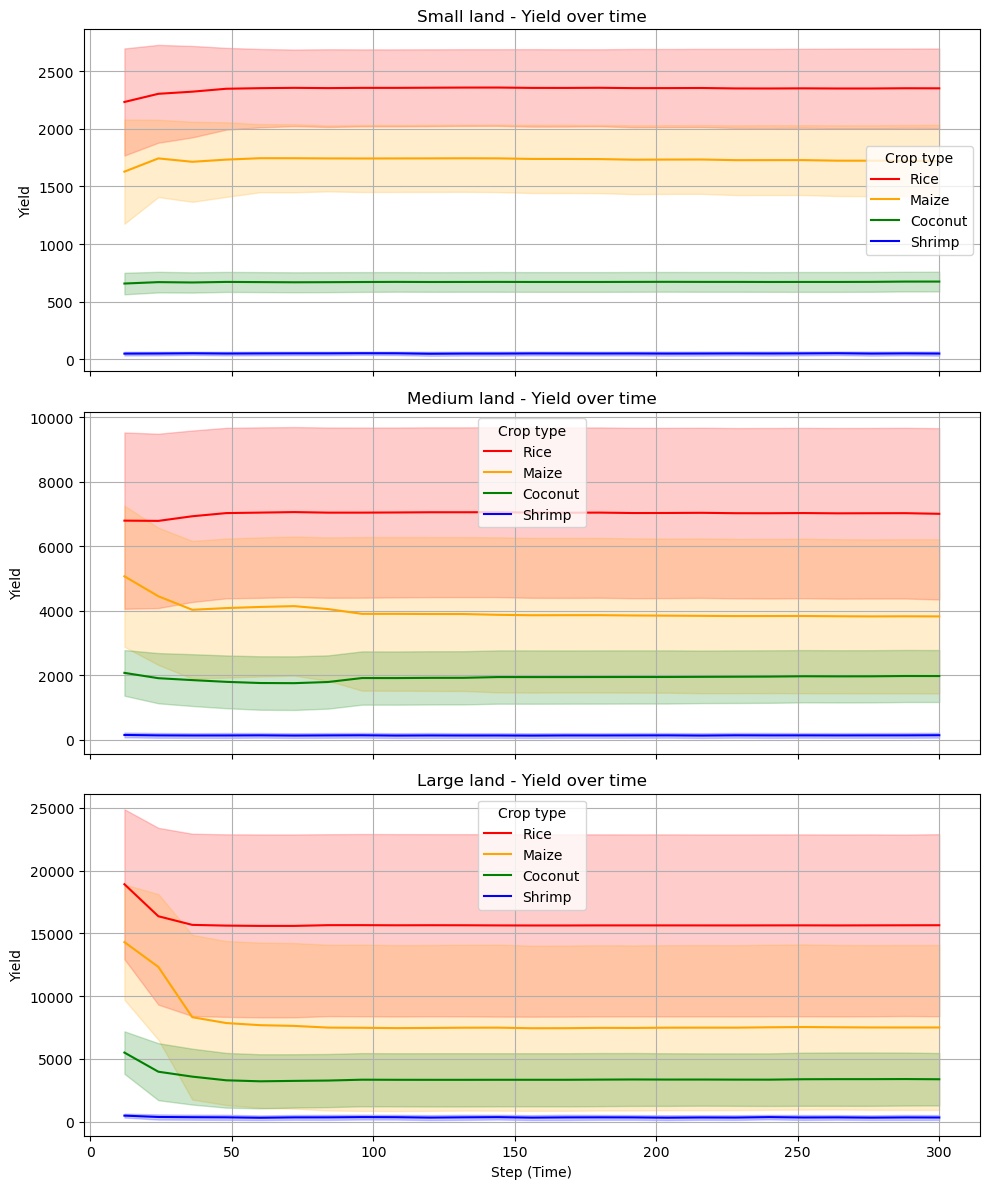

In [ ]:
# Zorg dat land_category in kleine letters is
df['Land_category'] = df['Land_category'].str.lower()

# Mapping van kolomnamen naar nette crop labels
yield_columns = {
    'yield_rice': 'Rice',
    'yield_maize': 'Maize',
    'yield_coconut': 'Coconut',
    'yield_shrimp': 'Shrimp'
}
colors = {
    'Rice': 'red',
    'Maize': 'orange',
    'Coconut': 'green',
    'Shrimp': 'blue'
}

# Maak 3 subplots (één per land_category)
fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=True)
land_categories = ['small', 'medium', 'large']

for ax, land in zip(axes, land_categories):
    # Filter voor de juiste landcategorie
    land_df = df[df['Land_category'] == land]

    for col, crop_label in yield_columns.items():
        # Groepeer per tijdstip (Step), neem mean + std
        grouped = land_df.groupby('Step')[col].agg(['mean', 'std']).reset_index()
        
        steps = grouped['Step']
        mean_vals = grouped['mean']
        std_vals = grouped['std']

        ax.plot(steps, mean_vals, label=crop_label, color=colors.get(crop_label, 'gray'))
        ax.fill_between(steps, mean_vals - std_vals, mean_vals + std_vals,
                        alpha=0.2, color=colors.get(crop_label, 'gray'))

    ax.set_title(f'{land.capitalize()} land - Yield over time')
    ax.set_ylabel('Yield')
    ax.grid(True)
    ax.legend(title='Crop type')

axes[-1].set_xlabel('Step (Time)')
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Groepeer op tijdstap (Step)
grouped = df.groupby('Step')['Number_of_wage_workers'].agg(['mean', 'std']).reset_index()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(grouped['Step'], grouped['mean'], label='Average wage workers', color='purple')
plt.fill_between(grouped['Step'],
                 grouped['mean'] - grouped['std'],
                 grouped['mean'] + grouped['std'],
                 alpha=0.2, color='purple')

plt.title('Number of Wage Workers over Time')
plt.xlabel('Step (Time)')
plt.ylabel('Number of Wage Workers')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


NameError: name 'df' is not defined